Bring Libraries

In [1]:
import pandas as pd
import pykrakenapi 
from pykrakenapi import KrakenAPI
import krakenex

import plotly.graph_objects as go
import plotly.express as px

import mplfinance as mpf

api=krakenex.API()
k=KrakenAPI(api)

BTC (Default style):
DataFrame = 1D (1440).

In [2]:
ohlc_D = k.get_ohlc_data('BTCUSD', interval=1440, since =10000,ascending = True)
ohlc_D[0].head()
print (ohlc_D)

(                  time     open     high      low    close     vwap  \
dtime                                                                 
2022-02-05  1644019200  41597.2  41926.4  40883.7  41419.0  41509.6   
2022-02-06  1644105600  41419.0  42694.5  41141.9  42419.5  41772.3   
2022-02-07  1644192000  42426.1  44528.6  41697.4  43867.2  43382.3   
2022-02-08  1644278400  43873.1  45500.0  42709.6  44079.1  43881.5   
2022-02-09  1644364800  44083.1  44831.0  43187.2  44420.0  44013.4   
...                ...      ...      ...      ...      ...      ...   
2024-01-21  1705795200  41649.9  42260.0  41482.8  41554.7  41687.0   
2024-01-22  1705881600  41554.8  41654.2  39410.9  39510.0  40323.0   
2024-01-23  1705968000  39510.0  40100.0  38518.0  39844.0  39231.1   
2024-01-24  1706054400  39844.0  40492.3  39451.1  40069.8  39930.5   
2024-01-25  1706140800  40069.8  40261.7  39788.0  39880.5  40030.8   

                 volume  count  
dtime                           
2022-02-0

Parametro de analisis de velas centrado
Lista S&R


In [3]:

ohlc_D[0].low.rolling(5, center =True).min()

supports_D = ohlc_D[0][ohlc_D[0].low==ohlc_D[0].low.rolling(10, center =True).min()].low
resistances_D = ohlc_D[0][ohlc_D[0].high==ohlc_D[0].high.rolling(10, center =True).max()].high
supports_D, resistances_D

(dtime
 2022-02-24    34333.2
 2022-03-07    37159.4
 2022-03-14    37584.5
 2022-04-01    44257.6
 2022-04-11    39240.0
 2022-04-18    38570.0
 2022-05-12    25332.8
 2022-05-18    28589.1
 2022-05-26    27505.0
 2022-06-18    17600.0
 2022-06-30    18617.5
 2022-07-13    18900.0
 2022-07-26    20696.0
 2022-08-04    22400.0
 2022-08-20    20778.0
 2022-08-28    19525.8
 2022-09-07    18550.0
 2022-09-21    18138.4
 2022-09-28    18487.5
 2022-10-13    18163.1
 2022-10-21    18657.1
 2022-11-03    20050.0
 2022-11-09    15555.0
 2022-11-21    15470.5
 2022-11-28    16000.0
 2022-12-07    16700.0
 2022-12-19    16260.2
 2022-12-30    16325.2
 2023-02-13    21359.1
 2023-02-25    22739.9
 2023-03-10    19549.9
 2023-03-27    26491.9
 2023-04-03    27212.7
 2023-04-24    26969.4
 2023-05-12    25827.4
 2023-05-18    26345.0
 2023-05-25    25865.0
 2023-06-06    25369.0
 2023-06-15    24751.1
 2023-06-30    29375.6
 2023-07-07    29699.0
 2023-07-18    29500.0
 2023-07-24    28880.0
 202

Concatenado de las listas

In [4]:
levels_D=pd.concat([supports_D, resistances_D])
levels_D=levels_D[abs(levels_D.diff())>1680] 
levels_D

dtime
2022-03-07    37159.4
2022-04-01    44257.6
2022-04-11    39240.0
2022-05-12    25332.8
2022-05-18    28589.1
2022-06-18    17600.0
2022-07-26    20696.0
2022-08-04    22400.0
2022-11-09    15555.0
2023-02-13    21359.1
2023-03-10    19549.9
2023-03-27    26491.9
2023-06-30    29375.6
2023-08-17    24800.0
2023-11-14    34666.0
2023-12-11    39999.0
2024-01-03    39501.0
2024-01-12    41476.0
2022-02-10    45900.0
2022-03-09    42590.6
2022-03-28    48200.0
2022-04-21    42950.0
2022-05-04    40029.8
2022-05-31    32400.0
2022-06-26    21867.0
2022-07-20    24264.6
2022-09-13    22790.0
2022-09-27    20383.0
2022-12-05    17440.0
2023-02-02    24282.1
2023-03-22    28879.9
2023-04-14    31050.0
2023-05-23    27511.7
2023-06-23    31435.3
2023-08-02    30000.0
2023-08-29    28150.0
2023-10-24    35225.0
2023-11-09    37971.0
2023-12-08    44699.0
2024-01-11    49000.0
dtype: object

## BTC D:


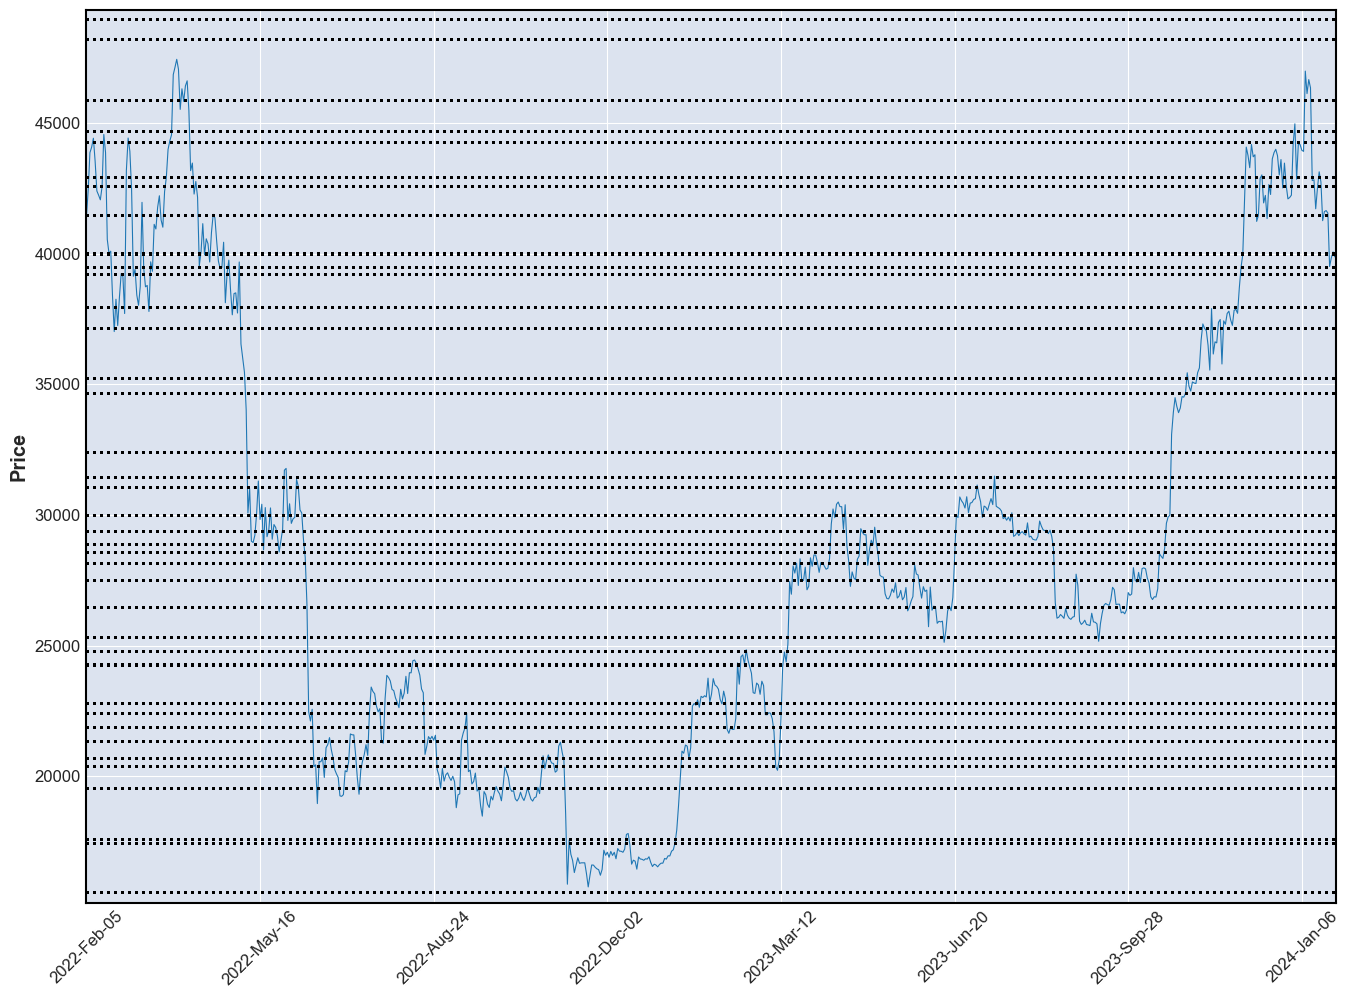

In [5]:
mpf.plot(ohlc_D[0],hlines=dict(hlines=levels_D.to_list(),
        colors=['black'],linestyle=':'),type='line',figscale=1.8,
        tight_layout=True,style='default')

BTC:
DataFrame = 4H(240).

In [6]:
ohlc_4H = k.get_ohlc_data('BTCUSD', interval=240, since =100000,ascending = True)
ohlc_4H[0].head()
print (ohlc_4H)

(                           time     open     high      low    close     vwap  \
dtime                                                                          
2023-09-27 16:00:00  1695830400  26287.6  26295.4  26100.1  26248.4  26226.0   
2023-09-27 20:00:00  1695844800  26248.5  26366.1  26212.8  26359.9  26282.6   
2023-09-28 00:00:00  1695859200  26359.9  26515.3  26329.9  26356.8  26407.5   
2023-09-28 04:00:00  1695873600  26356.8  26479.3  26351.4  26458.1  26432.7   
2023-09-28 08:00:00  1695888000  26458.1  26577.7  26380.4  26450.5  26469.0   
...                         ...      ...      ...      ...      ...      ...   
2024-01-24 20:00:00  1706126400  39796.6  40145.0  39451.1  40069.8  39801.0   
2024-01-25 00:00:00  1706140800  40069.8  40154.2  39920.4  40013.3  40052.3   
2024-01-25 04:00:00  1706155200  40013.3  40083.9  39788.0  40083.8  39969.4   
2024-01-25 08:00:00  1706169600  40083.9  40261.7  39955.9  40149.8  40093.1   
2024-01-25 12:00:00  1706184000  40149.

In [7]:
ohlc_4H[0].low.rolling(5, center =True).min()

dtime
2023-09-27 16:00:00        NaN
2023-09-27 20:00:00        NaN
2023-09-28 00:00:00    26100.1
2023-09-28 04:00:00    26212.8
2023-09-28 08:00:00    26329.9
                        ...   
2024-01-24 20:00:00    39451.1
2024-01-25 00:00:00    39451.1
2024-01-25 04:00:00    39451.1
2024-01-25 08:00:00        NaN
2024-01-25 12:00:00        NaN
Freq: 240T, Name: low, Length: 720, dtype: float64

In [8]:
supports_4H = ohlc_4H[0][ohlc_4H[0].low==ohlc_4H[0].low.rolling(10, center =True).min()].low
resistances_4H = ohlc_4H[0][ohlc_4H[0].high==ohlc_4H[0].high.rolling(10, center =True).max()].high
supports_4H, resistances_4H

(dtime
 2023-09-29 12:00:00    26692.0
 2023-10-03 20:00:00    27189.0
 2023-10-05 16:00:00    27366.1
 2023-10-06 12:00:00    27185.1
 2023-10-08 12:00:00    27740.1
 2023-10-09 16:00:00    27275.0
 2023-10-11 16:00:00    26551.0
 2023-10-12 16:00:00    26560.0
 2023-10-13 16:00:00    26675.0
 2023-10-14 20:00:00    26820.0
 2023-10-19 00:00:00    28150.5
 2023-10-26 16:00:00    33717.2
 2023-10-27 16:00:00    33318.6
 2023-10-31 08:00:00    34060.1
 2023-11-01 12:00:00    34120.0
 2023-11-03 08:00:00    34133.0
 2023-11-05 20:00:00    34520.1
 2023-11-07 12:00:00    34560.0
 2023-11-11 20:00:00    36658.0
 2023-11-14 16:00:00    34666.0
 2023-11-16 16:00:00    35517.2
 2023-11-19 12:00:00    36416.4
 2023-11-22 00:00:00    35645.0
 2023-11-27 16:00:00    36720.0
 2023-11-30 12:00:00    37501.0
 2023-12-04 12:00:00    39476.0
 2023-12-07 08:00:00    42885.0
 2023-12-09 20:00:00    43606.0
 2023-12-11 00:00:00    39999.0
 2023-12-13 00:00:00    40606.6
 2023-12-14 12:00:00    41359.0
 

En 4 horas cambiamos el diferencial a 85. '(diff())>85'

In [9]:
levels_4H=pd.concat([supports_4H, resistances_4H])
levels_4H=levels_4H[abs(levels_4H.diff())>705] 
levels_4H

dtime
2023-10-11 16:00:00    26551.0
2023-10-19 00:00:00    28150.5
2023-10-26 16:00:00    33717.2
2023-10-31 08:00:00    34060.1
2023-11-11 20:00:00    36658.0
2023-11-14 16:00:00    34666.0
2023-11-16 16:00:00    35517.2
2023-11-19 12:00:00    36416.4
2023-11-22 00:00:00    35645.0
2023-11-27 16:00:00    36720.0
2023-11-30 12:00:00    37501.0
2023-12-04 12:00:00    39476.0
2023-12-07 08:00:00    42885.0
2023-12-09 20:00:00    43606.0
2023-12-11 00:00:00    39999.0
2023-12-14 12:00:00    41359.0
2023-12-18 08:00:00    40515.9
2023-12-23 04:00:00    43314.0
2023-12-26 16:00:00    41637.1
2024-01-03 12:00:00    39501.0
2024-01-05 00:00:00    42480.0
2024-01-08 04:00:00    43208.5
2024-01-09 12:00:00    44500.0
2024-01-12 20:00:00    41476.0
2024-01-18 20:00:00    40625.0
2024-01-23 12:00:00    38518.0
2024-01-24 20:00:00    39451.1
2023-09-28 16:00:00    27312.9
2023-10-02 12:00:00    28572.5
2023-10-13 20:00:00    27137.0
2023-10-16 12:00:00    30000.0
2023-10-18 04:00:00    28980.6
20

## BTC 4H:

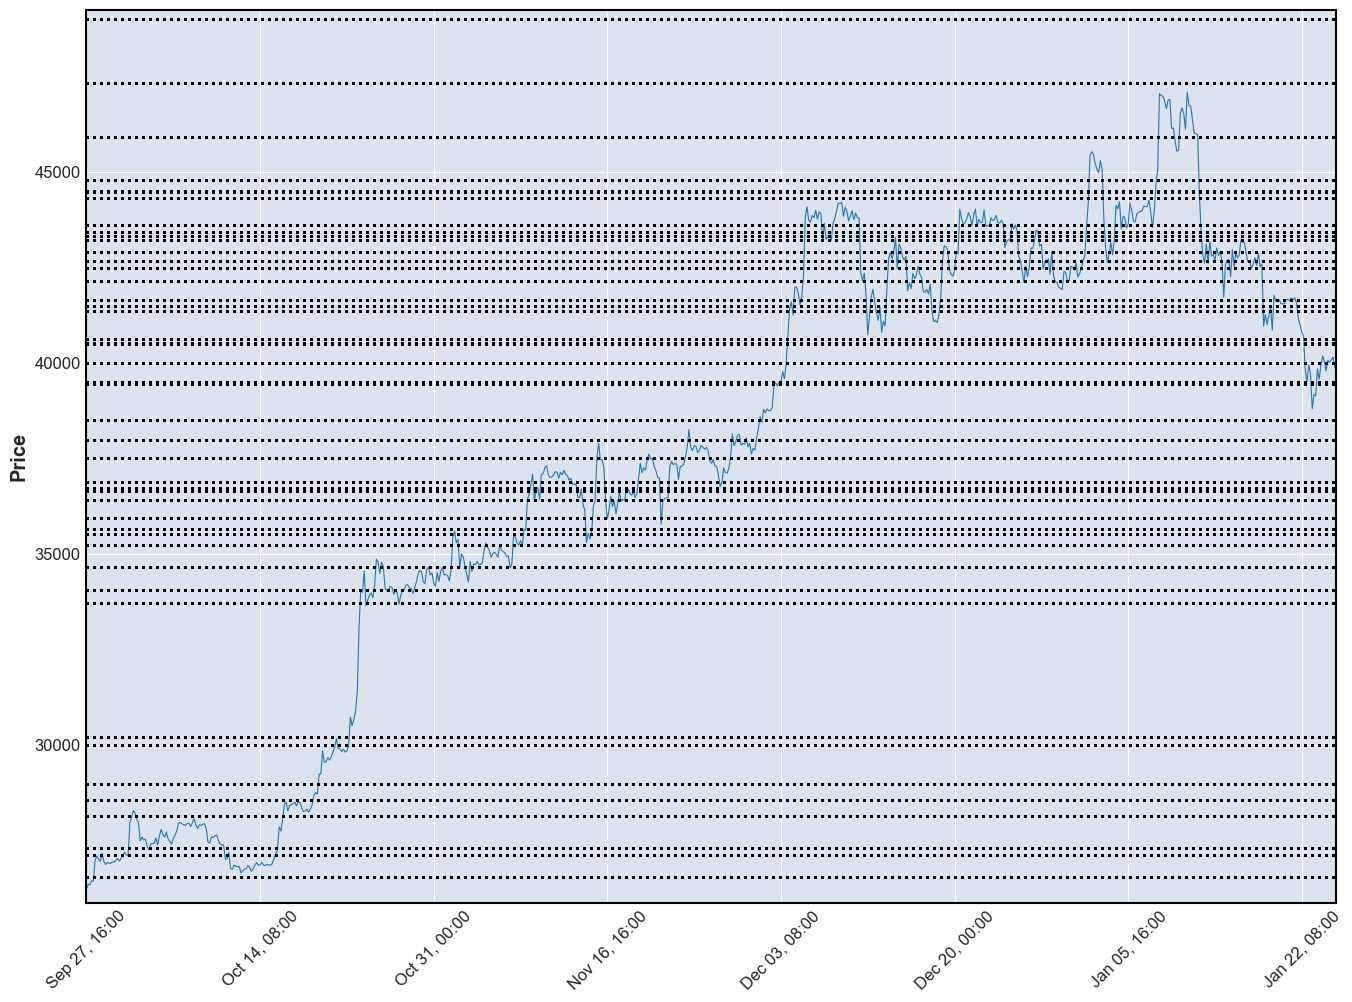

In [10]:
mpf.plot(ohlc_4H[0],hlines=dict(hlines=levels_4H.to_list(),
        colors=['black'],linestyle=':'),type='line',figscale=1.8,
        tight_layout=True,style='default')

ETH Daily:

In [11]:
ohlc_EthD = k.get_ohlc_data('ETHUSD', interval=1440, since =10000,ascending = True)
ohlc_EthD[0].head()


ohlc_EthD[0].low.rolling(5, center =True).min()

supports_EthD = ohlc_EthD[0][ohlc_EthD[0].low==ohlc_EthD[0].low.rolling(10, center =True).min()].low
resistances_EthD = ohlc_EthD[0][ohlc_EthD[0].high==ohlc_EthD[0].high.rolling(10, center =True).max()].high
supports_EthD, resistances_D

(dtime
 2022-02-13     2832.0
 2022-02-24    2301.01
 2022-03-07    2445.81
 2022-04-11     2951.0
 2022-04-18    2880.17
 2022-05-12     1700.0
 2022-05-19     1900.0
 2022-05-27     1704.7
 2022-06-18     880.31
 2022-06-30      997.0
 2022-07-13    1006.03
 2022-07-26    1355.34
 2022-08-02    1559.18
 2022-08-20    1524.36
 2022-08-28    1423.35
 2022-09-07     1490.0
 2022-09-21    1219.33
 2022-09-28    1253.54
 2022-10-13    1188.42
 2022-10-21    1252.67
 2022-11-09     1070.0
 2022-11-22    1073.33
 2022-12-07     1219.4
 2022-12-19    1150.24
 2022-12-28     1180.5
 2023-01-25     1518.0
 2023-02-13    1463.88
 2023-02-25    1558.29
 2023-03-10     1370.0
 2023-03-27     1686.5
 2023-04-26     1787.0
 2023-05-12     1740.0
 2023-05-18    1772.15
 2023-05-25    1761.43
 2023-06-05     1777.0
 2023-06-15    1620.06
 2023-06-28    1817.06
 2023-07-07    1825.99
 2023-07-24    1832.51
 2023-08-07    1800.59
 2023-08-17    1517.07
 2023-09-01     1600.1
 2023-09-11    1530.85
 202

In [12]:
levels_EthD=pd.concat([supports_EthD, resistances_EthD])
levels_EthD=levels_EthD[abs(levels_EthD.diff())>170] 
srtd_lvls=levels_EthD.sort_values(ascending=False)
print(srtd_lvls)

dtime
2022-04-03     3580.0
2022-02-10    3283.77
2022-04-21    3180.24
2022-03-02    3044.85
2022-05-04     2969.0
2022-04-11     2951.0
2024-01-12    2716.13
2023-12-09    2401.82
2022-02-24    2301.01
2023-04-16    2141.07
2023-11-10     2137.0
2022-08-14     2029.9
2022-05-31    2015.05
2023-04-26    1964.14
2023-11-17    1905.47
2022-05-19     1900.0
2023-10-26     1866.0
2024-01-03     1860.0
2023-06-28    1817.06
2022-07-28     1784.0
2022-08-25    1723.07
2022-05-27     1704.7
2022-05-12     1700.0
2023-03-27     1686.5
2023-01-21    1679.01
2022-10-29    1664.17
2022-08-02    1559.18
2023-01-25     1518.0
2023-08-17    1517.07
2022-09-27    1399.59
2023-03-10     1370.0
2022-07-26    1355.34
2022-11-30     1309.0
2022-06-26    1281.89
2022-09-21    1219.33
2022-11-09     1070.0
2022-06-18     880.31
dtype: object


## ETH D

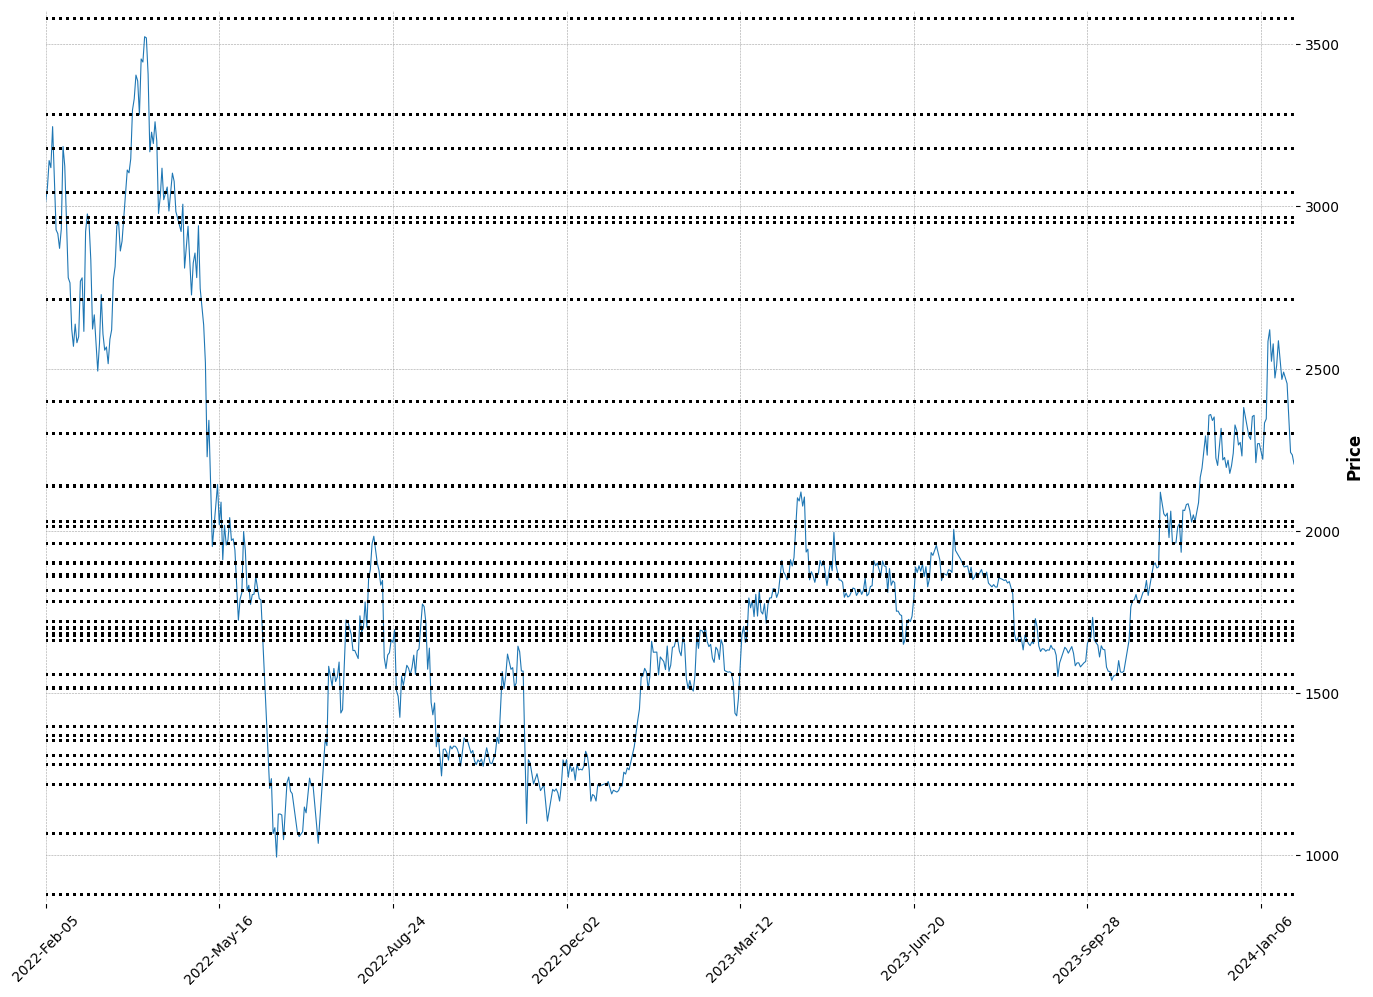

In [13]:
mpf.plot(ohlc_EthD[0],hlines=dict(hlines=levels_EthD.to_list(),
        colors=['black'],linestyle=':'),type='line',figscale=1.8,
        tight_layout=True,style='charles')

ETH 4H:

In [14]:
ohlc_Eth4H = k.get_ohlc_data('ETHUSD', interval=240, since =1000000,ascending = True)
ohlc_Eth4H[0].head()

ohlc_Eth4H[0].low.rolling(5, center =True).min()

supports_Eth4H = ohlc_Eth4H[0][ohlc_Eth4H[0].low==ohlc_Eth4H[0].low.rolling(10, center =True).min()].low
resistances_Eth4H = ohlc_Eth4H[0][ohlc_Eth4H[0].high==ohlc_Eth4H[0].high.rolling(10, center =True).max()].high

levels_Eth4H=pd.concat([supports_Eth4H, resistances_Eth4H])
levels_Eth4H=levels_Eth4H[abs(levels_Eth4H.diff())>70] 
srtd_lvls=levels_Eth4H.sort_values(ascending=False)
print(srtd_lvls)

dtime
2024-01-11 12:00:00    2690.97
2024-01-13 20:00:00    2588.58
2024-01-19 20:00:00    2502.09
2023-12-28 00:00:00    2445.04
2024-01-12 20:00:00    2438.29
2024-01-02 08:00:00    2430.92
2023-12-08 04:00:00     2390.0
2024-01-08 16:00:00    2358.98
2023-12-22 12:00:00    2342.82
2024-01-04 20:00:00     2297.5
2023-12-04 08:00:00    2275.38
2023-12-23 04:00:00    2269.13
2024-01-24 08:00:00    2262.21
2023-12-16 16:00:00    2259.61
2023-12-29 20:00:00     2258.0
2024-01-09 12:00:00     2230.0
2023-12-06 20:00:00    2221.57
2024-01-05 16:00:00    2209.32
2023-12-02 16:00:00    2187.99
2024-01-23 12:00:00     2165.9
2023-12-04 12:00:00     2148.0
2023-11-10 04:00:00     2137.0
2023-12-13 00:00:00    2135.56
2024-01-08 12:00:00     2118.0
2023-12-18 08:00:00     2116.6
2023-11-20 16:00:00    2068.25
2023-11-11 00:00:00    2030.82
2023-12-11 00:00:00     1980.0
2023-11-18 16:00:00    1972.14
2023-11-14 16:00:00     1933.0
2024-01-03 12:00:00     1860.0
2023-10-24 12:00:00    1854.56
20

## ETH 4H

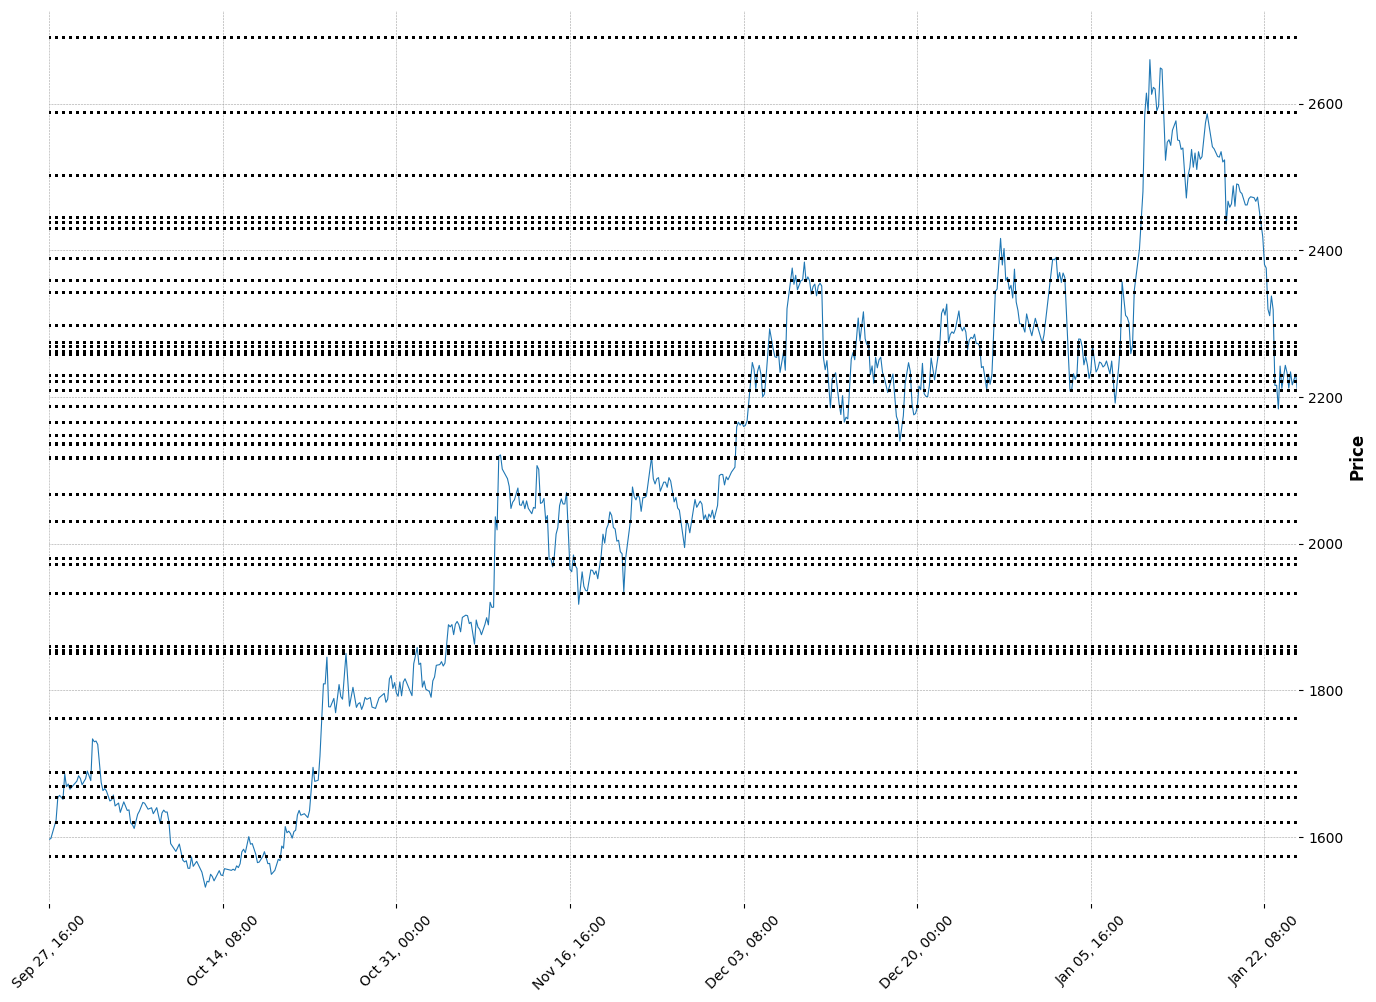

In [15]:
mpf.plot(ohlc_Eth4H[0],hlines=dict(hlines=levels_Eth4H.to_list(),
        colors=['black'],linestyle=':'),type='line',figscale=1.8,
        tight_layout=True,style='charles')

XRP D:

In [16]:
ohlc_XrpD = k.get_ohlc_data('XRPUSD', interval=1440, since =10000,ascending = True)
ohlc_XrpD[0].head()


ohlc_XrpD[0].low.rolling(5, center =True).min()

supports_XrpD = ohlc_XrpD[0][ohlc_XrpD[0].low==ohlc_XrpD[0].low.rolling(10, center =True).min()].low
resistances_XrpD = ohlc_XrpD[0][ohlc_XrpD[0].high==ohlc_XrpD[0].high.rolling(10, center =True).max()].high


In [17]:
levels_XrpD=pd.concat([supports_XrpD, resistances_XrpD])
levels_XrpD=levels_XrpD[abs(levels_XrpD.diff())>0.1705] 
srtd_lvls=levels_XrpD.sort_values(ascending=False)
print(srtd_lvls)

dtime
2023-07-13    0.94795
2022-03-01    0.80407
2023-07-25    0.67349
2022-09-23     0.5587
2023-08-29    0.54902
2022-05-31     0.4341
2023-08-17    0.39948
2022-05-12    0.33137
dtype: object


## XRP D

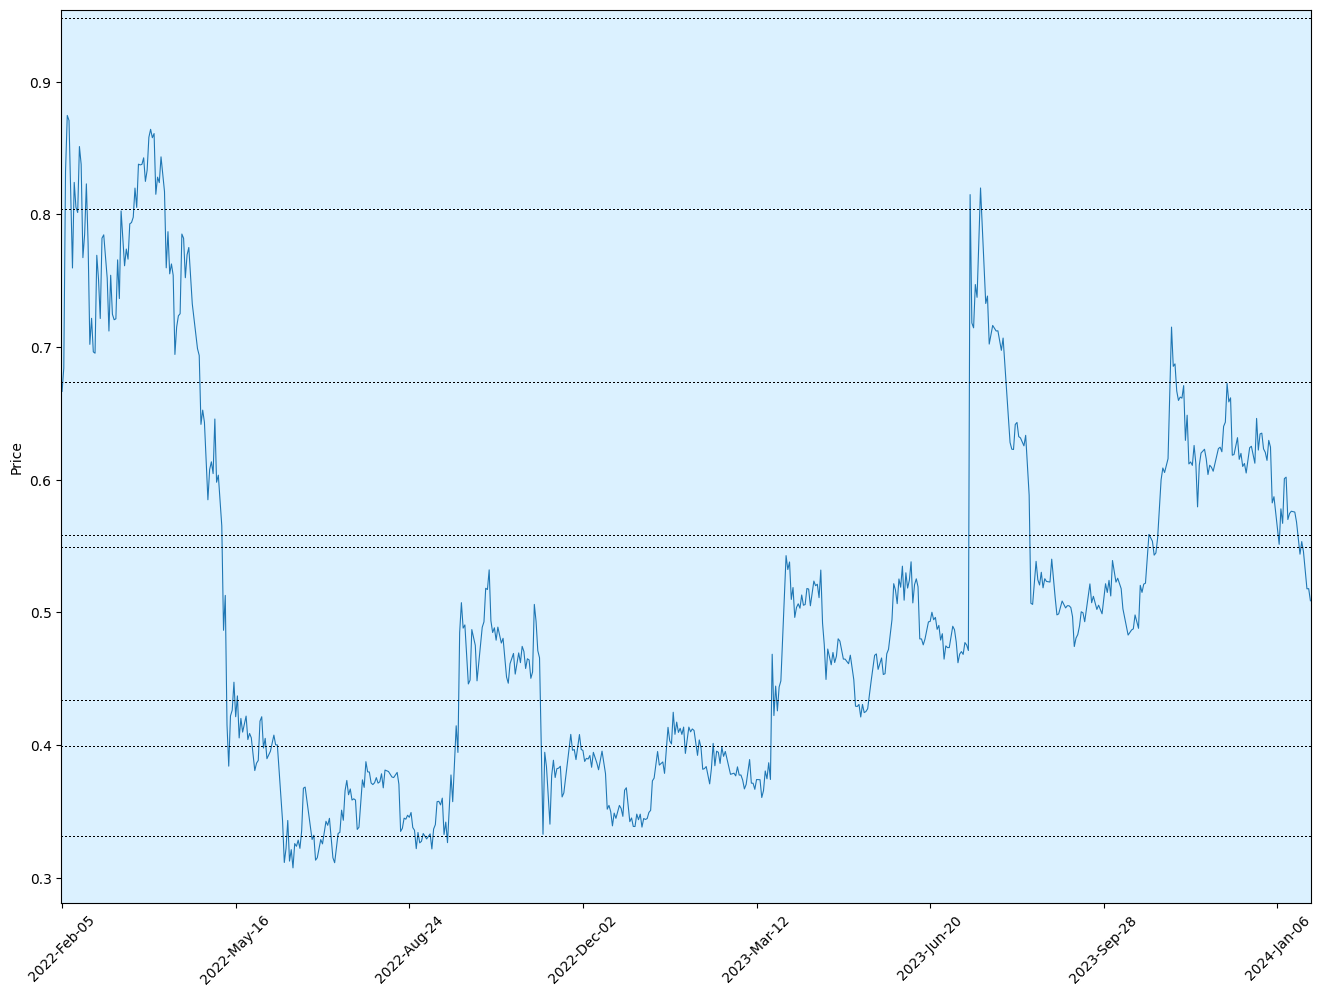

In [18]:
mpf.plot(ohlc_XrpD[0],hlines=dict(hlines=levels_XrpD.to_list(),
        colors=['black'],linestyle=':'),type='line',figscale=1.8,
        tight_layout=True,style='blueskies')

# XRP 4H:

In [19]:
ohlc_Xrp4H = k.get_ohlc_data('XRPUSD', interval=240, since =10000,ascending = True)
ohlc_Xrp4H[0].head()


ohlc_Xrp4H[0].low.rolling(5, center =True).min()

supports_Xrp4H = ohlc_Xrp4H[0][ohlc_Xrp4H[0].low==ohlc_Xrp4H[0].low.rolling(10, center =True).min()].low
resistances_Xrp4H = ohlc_Xrp4H[0][ohlc_Xrp4H[0].high==ohlc_Xrp4H[0].high.rolling(10, center =True).max()].high

levels_Xrp4H=pd.concat([supports_Xrp4H, resistances_Xrp4H])
levels_Xrp4H=levels_Xrp4H[abs(levels_Xrp4H.diff())>0.0705] 
srtd_lvls=levels_Xrp4H.sort_values(ascending=False)
print(srtd_lvls)

public call frequency exceeded (seconds=0.934996) 
 sleeping for 5 seconds
dtime
2023-11-06 12:00:00    0.73295
2023-11-16 04:00:00     0.6526
2024-01-05 16:00:00    0.55348
2024-01-03 12:00:00    0.45411
dtype: object


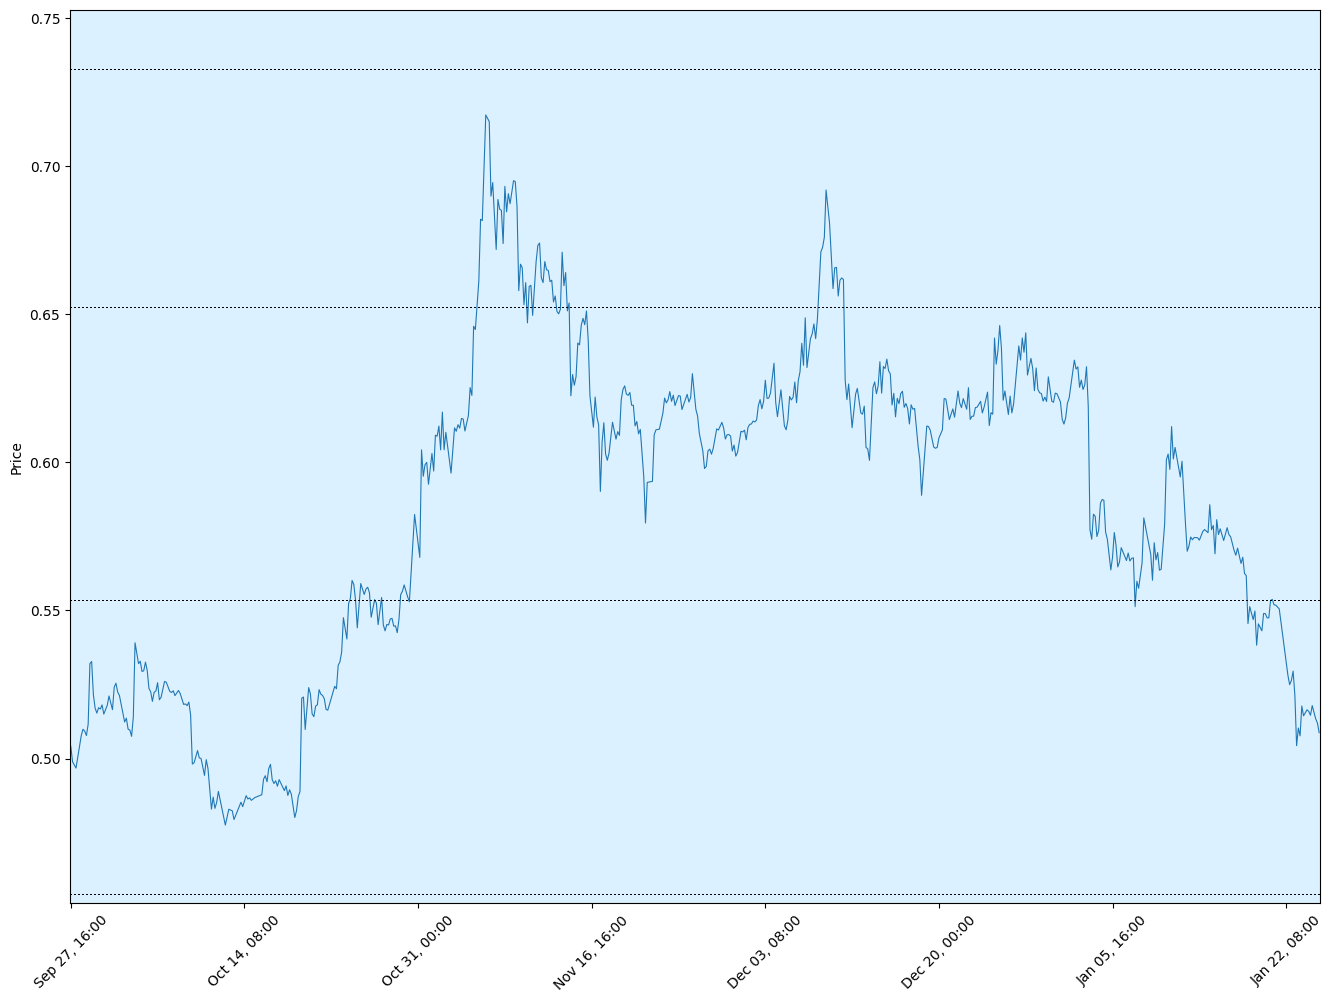

In [20]:
mpf.plot(ohlc_Xrp4H[0],hlines=dict(hlines=levels_Xrp4H.to_list(),
        colors=['black'],linestyle=':'),type='line',figscale=1.8,
        tight_layout=True,style='blueskies')

## SOL D

In [21]:
ohlc_SolD = k.get_ohlc_data('SOLUSD', interval=1440, since =1000000,ascending = True)
ohlc_SolD[0].head()

ohlc_SolD[0].low.rolling(5, center =True).min()

supports_SolD = ohlc_SolD[0][ohlc_SolD[0].low==ohlc_SolD[0].low.rolling(10, center =True).min()].low
resistances_SolD = ohlc_SolD[0][ohlc_SolD[0].high==ohlc_SolD[0].high.rolling(10, center =True).max()].high

levels_SolD=pd.concat([supports_SolD, resistances_SolD])
levels_SolD=levels_SolD[abs(levels_SolD.diff())>7.05] 
srtd_lvls=levels_SolD.sort_values(ascending=False)
print(srtd_lvls)

dtime
2022-04-02     143.5
2023-12-25    126.13
2024-01-02     117.0
2022-04-20    110.86
2024-01-11    107.26
2022-03-02     106.5
2022-04-11     98.21
2022-05-05      95.2
2023-12-29      93.5
2022-04-30      82.0
2023-12-09     77.72
2024-01-03      71.0
2023-11-16     68.16
2023-11-21     51.23
2022-07-19     47.32
2023-11-01     46.69
2022-06-24     42.85
2022-09-13     38.93
2023-10-25     33.89
2022-05-12      33.0
2023-07-14     32.42
2022-08-29     30.03
2022-06-14     25.87
2023-01-15     25.13
2023-07-25      22.7
2023-02-01      22.5
2022-11-26     14.94
2022-11-10     12.18
dtype: object


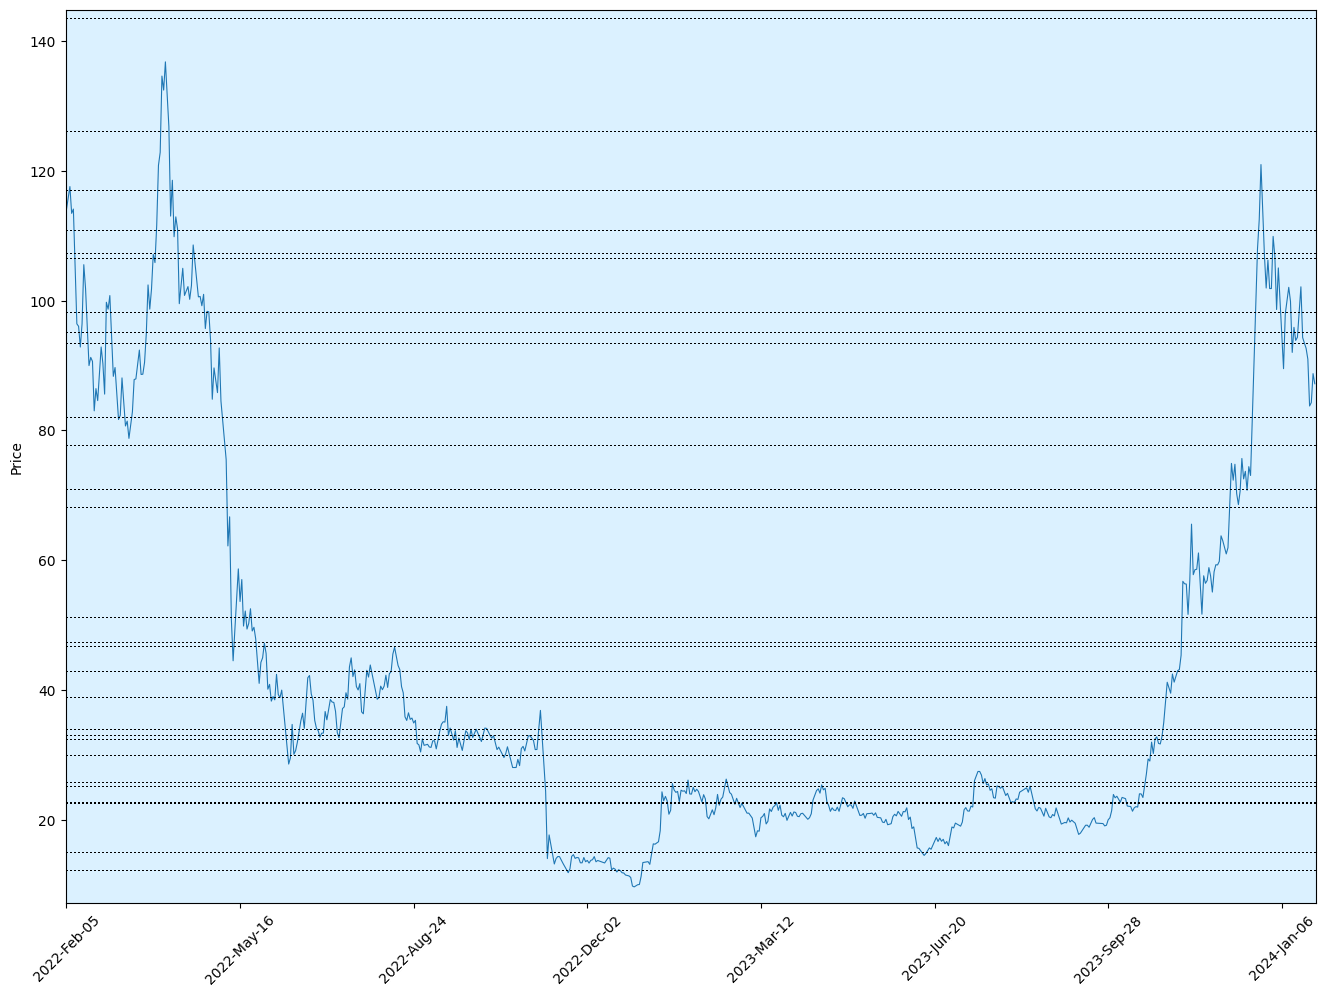

In [22]:
mpf.plot(ohlc_SolD[0],hlines=dict(hlines=levels_SolD.to_list(),
        colors=['black'],linestyle=':'),type='line',figscale=1.8,
        tight_layout=True,style='blueskies')

## SOL 4H

In [23]:
ohlc_Sol4H = k.get_ohlc_data('SOLUSD', interval=240, since =1000000,ascending = True)
ohlc_Sol4H[0].head()

ohlc_Sol4H[0].low.rolling(5, center =True).min()

supports_Sol4H = ohlc_Sol4H[0][ohlc_Sol4H[0].low==ohlc_Sol4H[0].low.rolling(10, center =True).min()].low
resistances_Sol4H = ohlc_Sol4H[0][ohlc_Sol4H[0].high==ohlc_Sol4H[0].high.rolling(10, center =True).max()].high

levels_Sol4H=pd.concat([supports_Sol4H, resistances_Sol4H])
levels_Sol4H=levels_Sol4H[abs(levels_Sol4H.diff())>7.05] 
srtd_lvls=levels_Sol4H.sort_values(ascending=False)
print(srtd_lvls)

dtime
2023-12-25 16:00:00    126.13
2023-12-24 04:00:00    118.13
2024-01-02 08:00:00     117.0
2023-12-29 08:00:00     109.9
2024-01-04 20:00:00    108.26
2023-12-26 16:00:00    102.04
2023-12-22 00:00:00     99.49
2024-01-21 08:00:00     93.85
2024-01-10 12:00:00     92.19
2024-01-06 04:00:00     91.73
2024-01-08 00:00:00     83.94
2024-01-23 12:00:00     78.96
2023-12-09 04:00:00     77.72
2023-12-16 00:00:00     71.25
2024-01-03 12:00:00      71.0
2023-11-16 04:00:00     68.16
2023-12-11 00:00:00      66.0
2023-11-11 12:00:00     63.99
2023-11-14 00:00:00     51.23
2023-11-01 16:00:00     46.69
2023-09-29 12:00:00     20.45
dtype: object


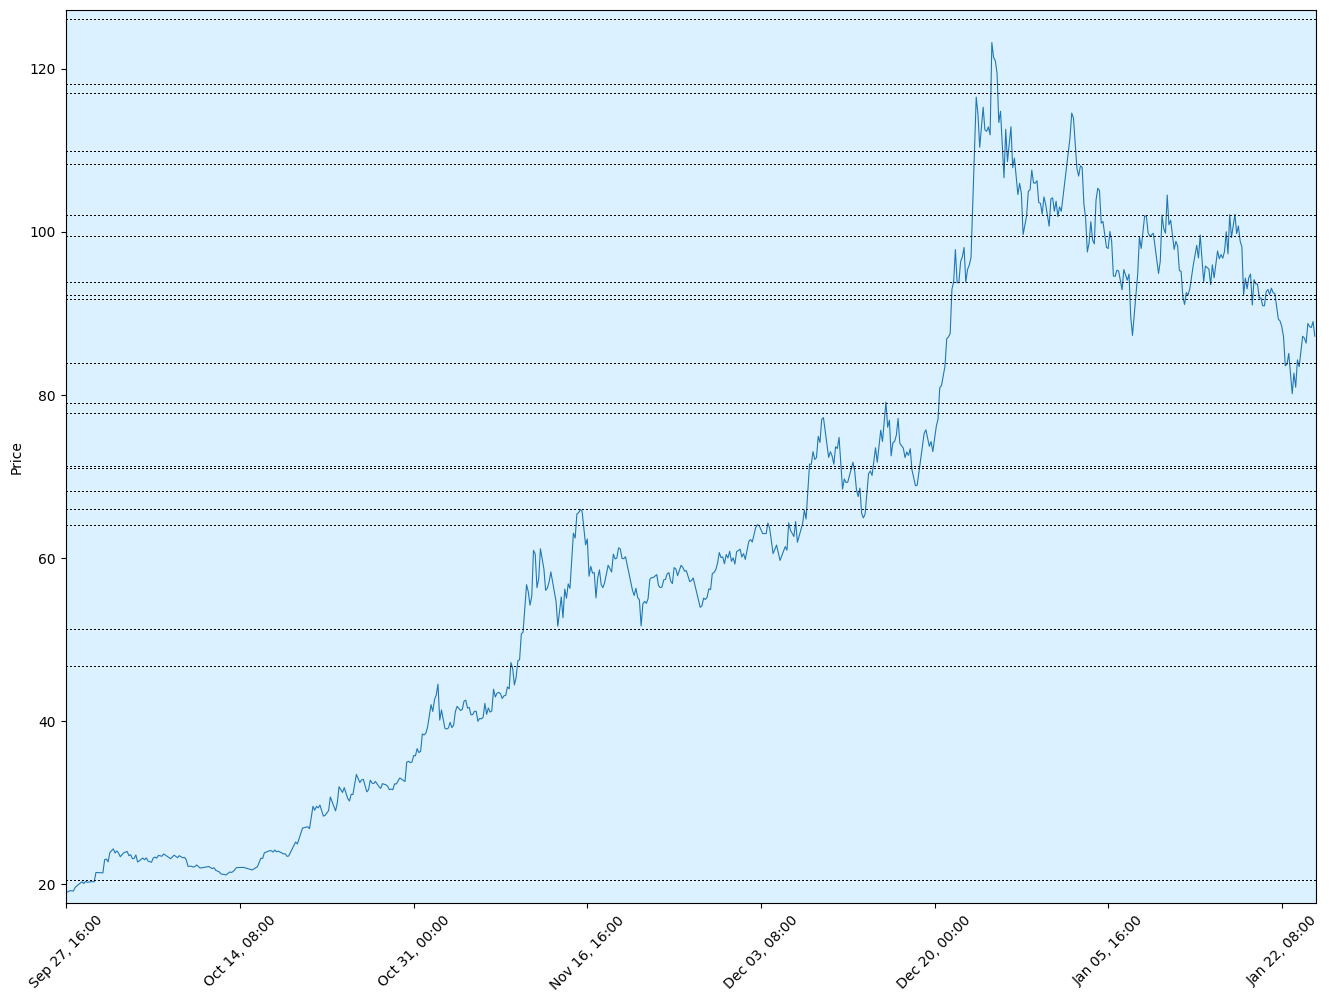

In [24]:
mpf.plot(ohlc_Sol4H[0],hlines=dict(hlines=levels_Sol4H.to_list(),
        colors=['black'],linestyle=':'),type='line',figscale=1.8,
        tight_layout=True,style='blueskies')
